<a href="https://colab.research.google.com/github/mkjubran/SMA/blob/main/StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook to extract financial data from yahoo

Installing Required Libraries

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Get Current Stock Price Data

In [ ]:
import yfinance as yf
ticker = yf.Ticker('GOOGL').info
market_price = ticker['currentPrice']
previous_close_price = ticker['regularMarketPreviousClose']
print('Ticker: GOOGL')
print('Market Price:', market_price)
print('Previous Close Price:', previous_close_price)

Ticker: GOOGL
Market Price: 122.23
Previous Close Price: 122.14


More info about the ticker

In [ ]:
import yfinance as yf
ticker = yf.Ticker('GOOGL').info
print(ticker.keys())

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryDisp', 'sector', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'payoutRatio', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currency', 'enterpriseValue', 'profitMargins', 'floatShares', 'sharesOutstanding', 'sharesShort', 'sharesShortPriorMonth', 'sharesShortPrevio

Get Historical Stock Price Data

In [ ]:
# Importing the yfinance package
import yfinance as yf
 
# Set the start and end date
start_date = '2020-01-01'
end_date = '2022-01-01'
 
# Set the ticker
ticker = 'GOOGL'
 
# Get the data
data = yf.download(ticker, start_date, end_date)
 
# Print the last 5 rows
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-12-27  147.255997  148.343994  147.169495  147.906494  147.906494   
2021-12-28  148.235992  148.298996  146.054504  146.686996  146.686996   
2021-12-29  146.644501  147.417007  145.647507  146.654999  146.654999   
2021-12-30  146.694000  147.300003  145.994507  146.200500  146.200500   
2021-12-31  146.050003  146.698502  144.852005  144.852005  144.852005   

              Volume  
Date                  
2021-12-27  15976000  
2021-12-28  18200000  
2021-12-29  17788000  
2021-12-30  15688000  
2021-12-31  18136000  


more frequent data, shorter period

In [ ]:
import yfinance as yf
start_date = '2023-06-03'
end_date = '2023-06-10'
ticker = 'GOOGL'
data = yf.download(ticker, start_date, end_date ,interval="1m")
data["Date"] = data.index
 
data = data[["Date", "Open", "High",
             "Low", "Close", "Adj Close", "Volume"]]
 
data.reset_index(drop=True, inplace=True)
print(data.head())

[*********************100%***********************]  1 of 1 completed
                       Date        Open        High         Low       Close  \
0 2023-06-05 09:30:00-04:00  124.010002  125.080002  123.839996  124.899902   
1 2023-06-05 09:31:00-04:00  124.849998  124.930000  124.260002  124.550003   
2 2023-06-05 09:32:00-04:00  124.570000  124.844002  124.440002  124.529999   
3 2023-06-05 09:33:00-04:00  124.544998  124.820000  124.500000  124.565002   
4 2023-06-05 09:34:00-04:00  124.570000  124.629997  124.363602  124.570000   

    Adj Close  Volume  
0  124.899902  924702  
1  124.550003   73561  
2  124.529999   83386  
3  124.565002   53314  
4  124.570000   66355  


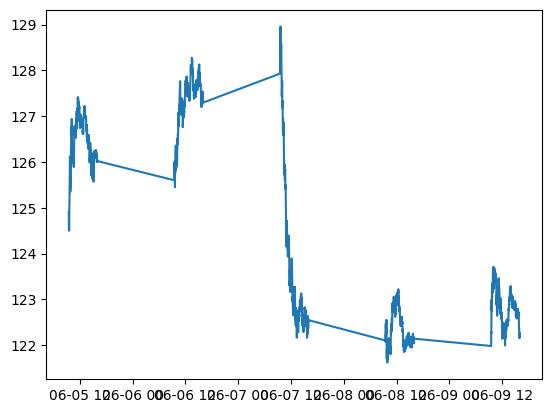

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['Date'],data['Close'])

If you want to pull data of multiple tickers at once, you can do so by providing the tickers in the form of a space-separated string.

In [ ]:
import yfinance as yf
start_date = '2020-01-01'
end_date = '2022-01-01'
 
# Add multiple space separated tickers here
ticker = 'GOOGL MSFT TSLA'
data = yf.download(ticker, start_date, end_date)
print(data.tail())

[*********************100%***********************]  3 of 3 completed
             Adj Close                               Close              \
                 GOOGL        MSFT        TSLA       GOOGL        MSFT   
Date                                                                     
2021-12-27  147.906494  337.685120  364.646667  147.906494  342.450012   
2021-12-28  146.686996  336.501801  362.823334  146.686996  341.250000   
2021-12-29  146.654999  337.192108  362.063324  146.654999  341.950012   
2021-12-30  146.200500  334.598663  356.779999  146.200500  339.320007   
2021-12-31  144.852005  331.640442  352.260010  144.852005  336.320007   

                              High                                 Low  \
                  TSLA       GOOGL        MSFT        TSLA       GOOGL   
Date                                                                     
2021-12-27  364.646667  148.343994  342.480011  372.333344  147.169495   
2021-12-28  362.823334  148.298996  343.80

Transforming Data for Analysis

In [ ]:
import yfinance as yf
start_date = '2023-06-03'
end_date = '2023-06-10'
ticker = 'GOOGL'
data = yf.download(ticker, start_date, end_date ,interval="1m")
data["Date"] = data.index
 
data = data[["Date", "Open", "High",
             "Low", "Close", "Adj Close", "Volume"]]
 
data.reset_index(drop=True, inplace=True)
print(data.head())

[*********************100%***********************]  1 of 1 completed
                       Date        Open        High         Low       Close  \
0 2023-06-05 09:30:00-04:00  124.010002  125.080002  123.839996  124.899902   
1 2023-06-05 09:31:00-04:00  124.849998  124.930000  124.260002  124.550003   
2 2023-06-05 09:32:00-04:00  124.570000  124.844002  124.440002  124.529999   
3 2023-06-05 09:33:00-04:00  124.544998  124.820000  124.500000  124.565002   
4 2023-06-05 09:34:00-04:00  124.570000  124.629997  124.363602  124.570000   

    Adj Close  Volume  
0  124.899902  924702  
1  124.550003   73561  
2  124.529999   83386  
3  124.565002   53314  
4  124.570000   66355  


In [ ]:
import yfinance as yf
from datetime import datetime

gold = yf.download(tickers="GC=F", period="5d", interval="1m")
gold
#start = datetime(2021, 10, 18, 9, 30, 0)
#end = datetime(2021, 10, 18, 10, 30, 0)

#filtered = gold[start: end]

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-06 00:00:00-04:00,1975.000000,1975.400024,1975.000000,1975.099976,1975.099976,0
2023-06-06 00:01:00-04:00,1975.199951,1975.300049,1975.099976,1975.199951,1975.199951,11
2023-06-06 00:02:00-04:00,1975.099976,1975.099976,1974.900024,1975.000000,1975.000000,29
2023-06-06 00:03:00-04:00,1975.000000,1975.300049,1975.000000,1975.300049,1975.300049,17
2023-06-06 00:04:00-04:00,1975.300049,1975.300049,1975.300049,1975.300049,1975.300049,2
...,...,...,...,...,...,...
2023-06-09 16:55:00-04:00,1975.300049,1975.500000,1975.199951,1975.500000,1975.500000,28
2023-06-09 16:56:00-04:00,1975.500000,1975.500000,1975.300049,1975.300049,1975.300049,15
2023-06-09 16:57:00-04:00,1975.199951,1975.500000,1975.199951,1975.400024,1975.400024,79
